### Fraud check using Decision trees

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [2]:
df=pd.read_csv("Fraud_check.csv")

In [3]:
df.head()

,Undergrad,Marital.Status,Taxable.Income,City.Population,Work.Experience,Urban
0,NO,Single,68833,50047,10,YES
1,YES,Divorced,33700,134075,18,YES
2,NO,Married,36925,160205,30,YES
3,YES,Single,50190,193264,15,YES
4,NO,Married,81002,27533,28,NO


In [4]:
df.isnull().sum()

Undergrad          0
Marital.Status     0
Taxable.Income     0
City.Population    0
Work.Experience    0
Urban              0
dtype: int64

<AxesSubplot:>

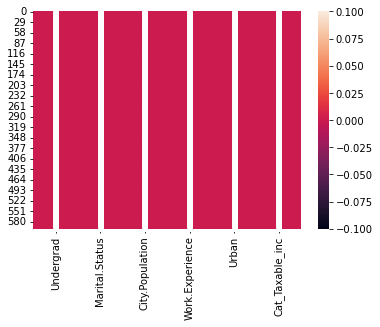

In [34]:
sns.heatmap(df.isnull(),annot=True)

In [5]:
df.duplicated().sum()

0

In [6]:
df.corr()

,Taxable.Income,City.Population,Work.Experience
Taxable.Income,1.000000,-0.064387,-0.001818
City.Population,-0.064387,1.000000,0.013135
Work.Experience,-0.001818,0.013135,1.000000


<AxesSubplot:>

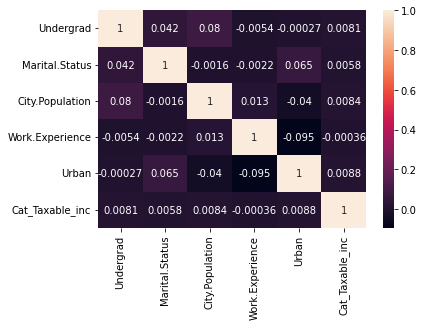

In [35]:
sns.heatmap(df.corr(),annot=True)

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 600 entries, 0 to 599
Data columns (total 6 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Undergrad        600 non-null    object
 1   Marital.Status   600 non-null    object
 2   Taxable.Income   600 non-null    int64 
 3   City.Population  600 non-null    int64 
 4   Work.Experience  600 non-null    int64 
 5   Urban            600 non-null    object
dtypes: int64(3), object(3)
memory usage: 28.2+ KB


In [8]:
df.isnull().sum()

Undergrad          0
Marital.Status     0
Taxable.Income     0
City.Population    0
Work.Experience    0
Urban              0
dtype: int64

<AxesSubplot:>

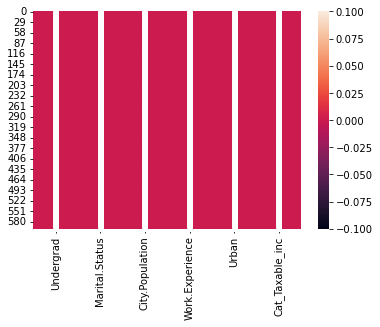

In [36]:
sns.heatmap(df.isnull(),annot=True)

In [9]:
df.corr()

,Taxable.Income,City.Population,Work.Experience
Taxable.Income,1.000000,-0.064387,-0.001818
City.Population,-0.064387,1.000000,0.013135
Work.Experience,-0.001818,0.013135,1.000000


<AxesSubplot:>

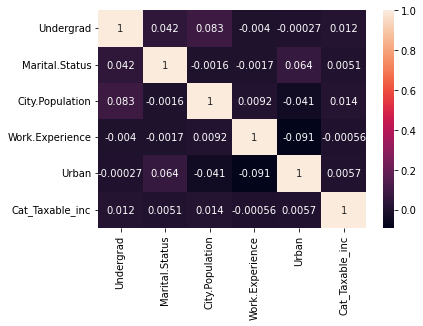

In [37]:
sns.heatmap(df.corr(method ='spearman'),annot=True)

In [10]:
df["Taxable.Income"].min()

10003

In [11]:
df["Taxable.Income"].max()

99619

In [12]:
# Converting Taget columns from Regression To Categorical as mentioned
bins=[10003,30000,99619]

taxable_conversion=["Risky","Good"]

df["Cat_Taxable_inc"]=pd.cut(df["Taxable.Income"],bins,labels=taxable_conversion)
df

,Undergrad,Marital.Status,Taxable.Income,City.Population,Work.Experience,Urban,Cat_Taxable_inc
0,NO,Single,68833,50047,10,YES,Good
1,YES,Divorced,33700,134075,18,YES,Good
2,NO,Married,36925,160205,30,YES,Good
3,YES,Single,50190,193264,15,YES,Good
4,NO,Married,81002,27533,28,NO,Good
...,...,...,...,...,...,...,...
595,YES,Divorced,76340,39492,7,YES,Good
596,YES,Divorced,69967,55369,2,YES,Good
597,NO,Divorced,47334,154058,0,YES,Good
598,YES,Married,98592,180083,17,NO,Good


In [13]:
df=df.drop("Taxable.Income",axis=1)

In [14]:
df

,Undergrad,Marital.Status,City.Population,Work.Experience,Urban,Cat_Taxable_inc
0,NO,Single,50047,10,YES,Good
1,YES,Divorced,134075,18,YES,Good
2,NO,Married,160205,30,YES,Good
3,YES,Single,193264,15,YES,Good
4,NO,Married,27533,28,NO,Good
...,...,...,...,...,...,...
595,YES,Divorced,39492,7,YES,Good
596,YES,Divorced,55369,2,YES,Good
597,NO,Divorced,154058,0,YES,Good
598,YES,Married,180083,17,NO,Good


In [15]:
from sklearn.preprocessing import StandardScaler, OrdinalEncoder,LabelEncoder
oe = OrdinalEncoder()
df.select_dtypes(object).columns
obj_enc=df.select_dtypes(object).columns
obj_enc


Index(['Undergrad', 'Marital.Status', 'Urban'], dtype='object')

In [16]:

oe=OrdinalEncoder()
df[obj_enc]=oe.fit_transform(df[obj_enc])
df


,Undergrad,Marital.Status,City.Population,Work.Experience,Urban,Cat_Taxable_inc
0,0.0,2.0,50047,10,1.0,Good
1,1.0,0.0,134075,18,1.0,Good
2,0.0,1.0,160205,30,1.0,Good
3,1.0,2.0,193264,15,1.0,Good
4,0.0,1.0,27533,28,0.0,Good
...,...,...,...,...,...,...
595,1.0,0.0,39492,7,1.0,Good
596,1.0,0.0,55369,2,1.0,Good
597,0.0,0.0,154058,0,1.0,Good
598,1.0,1.0,180083,17,0.0,Good


In [17]:
le=LabelEncoder()
df["Cat_Taxable_inc"]=le.fit_transform(df["Cat_Taxable_inc"])

In [18]:
df

,Undergrad,Marital.Status,City.Population,Work.Experience,Urban,Cat_Taxable_inc
0,0.0,2.0,50047,10,1.0,0
1,1.0,0.0,134075,18,1.0,0
2,0.0,1.0,160205,30,1.0,0
3,1.0,2.0,193264,15,1.0,0
4,0.0,1.0,27533,28,0.0,0
...,...,...,...,...,...,...
595,1.0,0.0,39492,7,1.0,0
596,1.0,0.0,55369,2,1.0,0
597,0.0,0.0,154058,0,1.0,0
598,1.0,1.0,180083,17,0.0,0


In [19]:
x=df.iloc[:,:-1]
y=df.iloc[:,-1]

In [20]:
from sklearn.model_selection import train_test_split
xtrain,xtest,ytrain,ytest=train_test_split(x,y,test_size=0.30, random_state=42)
xtrain.shape, xtest.shape, ytrain.shape, ytest.shape


((420, 5), (180, 5), (420,), (180,))

In [21]:
from sklearn.tree import DecisionTreeClassifier, DecisionTreeRegressor
from sklearn import tree

In [22]:
dt = DecisionTreeClassifier(criterion='gini')
dt.fit(xtrain,ytrain)
ypred = dt.predict(xtest)

In [23]:
from sklearn.metrics import classification_report
print(classification_report(ytest,ypred))

              precision    recall  f1-score   support

           0       0.78      0.76      0.77       143
           1       0.17      0.19      0.18        37

    accuracy                           0.64       180
   macro avg       0.48      0.48      0.48       180
weighted avg       0.66      0.64      0.65       180



In [24]:
print(dt.score(xtrain,ytrain))
dt.score(xtest, ytest)

1.0


0.6444444444444445

### Hyperparameter Tunning

In [25]:
from sklearn.model_selection import GridSearchCV

In [26]:
params={'criterion':["gini","entropy"],
       'splitter' : ["best", "random"],
       'max_depth' :[2, 3, 4, 5, 6, 7, 8, 9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31]
       }

In [27]:
grid = GridSearchCV(DecisionTreeClassifier(), param_grid=params,)

In [28]:
grid.fit(xtrain,ytrain)

GridSearchCV(estimator=DecisionTreeClassifier(),
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13,
                                       14, 15, 16, 17, 18, 19, 20, 21, 22, 23,
                                       24, 25, 26, 27, 28, 29, 30, 31],
                         'splitter': ['best', 'random']})

In [29]:
grid.best_params_

{'criterion': 'gini', 'max_depth': 2, 'splitter': 'random'}

In [30]:
dt = DecisionTreeClassifier(criterion='gini',max_depth=2, splitter= 'random')

In [31]:
dt.fit(xtrain,ytrain)
ypred = dt.predict(xtest)

In [32]:
print(classification_report(ytest,ypred))

              precision    recall  f1-score   support

           0       0.79      1.00      0.89       143
           1       0.00      0.00      0.00        37

    accuracy                           0.79       180
   macro avg       0.40      0.50      0.44       180
weighted avg       0.63      0.79      0.70       180



In [33]:
print(dt.score(xtrain,ytrain))
dt.score(xtest, ytest)

0.7928571428571428


0.7944444444444444

In [38]:
plt.rcParams['figure.figsize'] = (20,20)
plt.rcParams['figure.dpi'] = 250

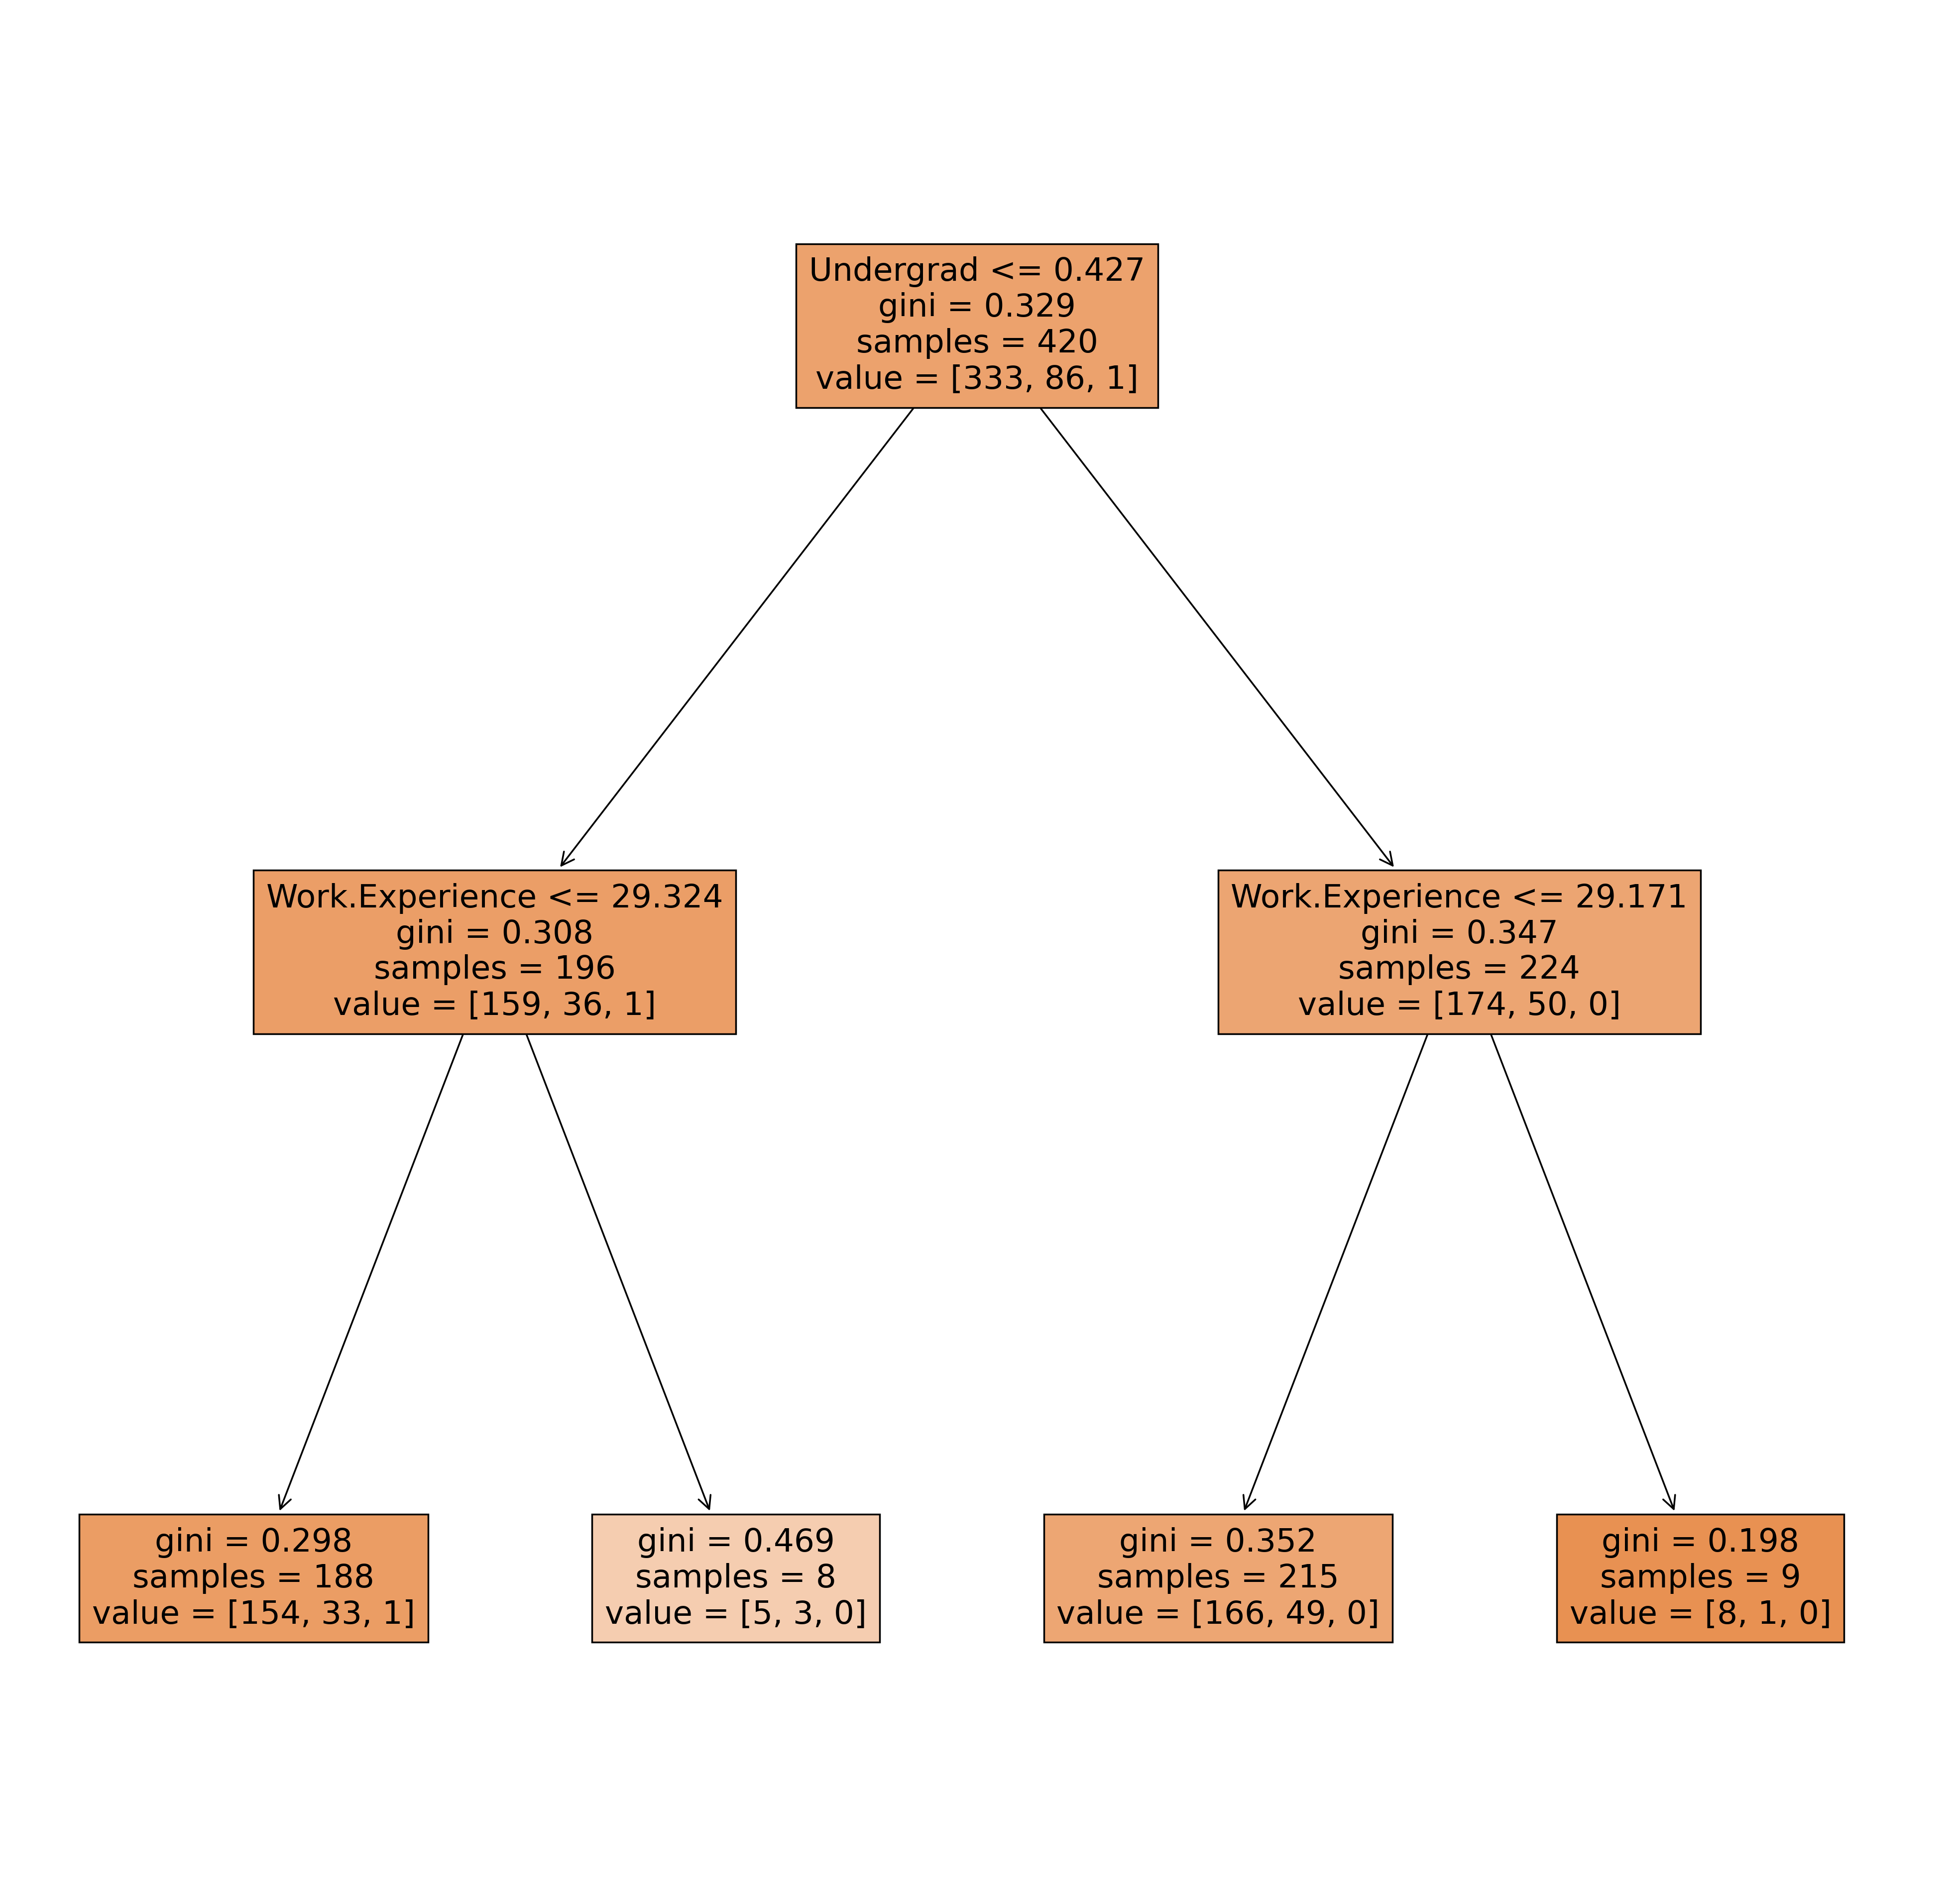

In [39]:
tree.plot_tree(dt, feature_names=x.columns, filled=True)
plt.show()